# Assignment 3
### Gemma Ragadini 545391


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os

### Introduction
In this work, I attempted to compare the spectrograms generated by certain notes played on different musical instruments using `librosa` library. The instruments I selected for this comparison are violin, cello, clarinet, and saxophone: two string instruments and two wind instruments, allowing for a comparison between these two categories as well.
Initially, I conducted a qualitative comparison of the four spectrograms computed for the same note played on different instruments. I provide an example using `C6`, while the following code is set up to compute the spectrograms for `G5`. I also fixed the mode of execution of the note; in the examples provided, they are always played "fortissimo" and "normal".
In the second part, I attempted to find a simple criterion to distinguish which instrument produces each note. Since the difference in timbre between instruments is due to the distribution of energy across various frequencies (harmonics), I tried calculating the first two of these ratios to separate the given note samples on a Cartesian plane.
For all the provided audio files, when generating the spectrograms, the first 0.3 seconds and the final part were trimmed to ensure that the graphs compared the notes over the same duration.

### C6 spectrograms
Below, I present the spectrograms of `C6-fortissimo-normal`, computed using the Short-Time Fourier Transform (STFT) and converted to decibels (dB) using `librosa.stft` and `librosa.amplitude_to_db` functions.

![Alt text](final.png)

Observing the spectrograms, the first thing we notice is that the fundamental frequency is the same, as we are analyzing the same note (the fundamental frequency of C6 is 1046.5 Hz), and that higher-frequency harmonics are present.
Additionally, we can see that bowed string instruments (violin and cello) exhibit a denser and less distinct spectrum compared to wind instruments (clarinet and saxophone). This suggests a greater presence of noise and resonances, likely due to the bow interacting with the strings and the resonance body of the instrument.+
Clarinet and saxophone spectrograms show less noise between harmonics, but the saxophone appears to have more energy distributed at higher frequencies. The cello has greater intensity at lower frequencies compared to the violin, which is expected given that it is a larger instrument with longer and thicker strings.
From this observation, we can get a sense of the differences between the analyzed instruments. The contrast between the two families (wind and string instruments) is particularly evident in terms of background noise. However, we also notice some differences between the two wind instruments and the two string instruments, influenced by size and sound production mechanisms.

### Other spectrograms
The following code allows for the calculation of four spectrograms for different notes by modifying the file names in the files array. The code is initially set to compute the spectrograms for G5 with the "fortissimo" and "normal" modes.

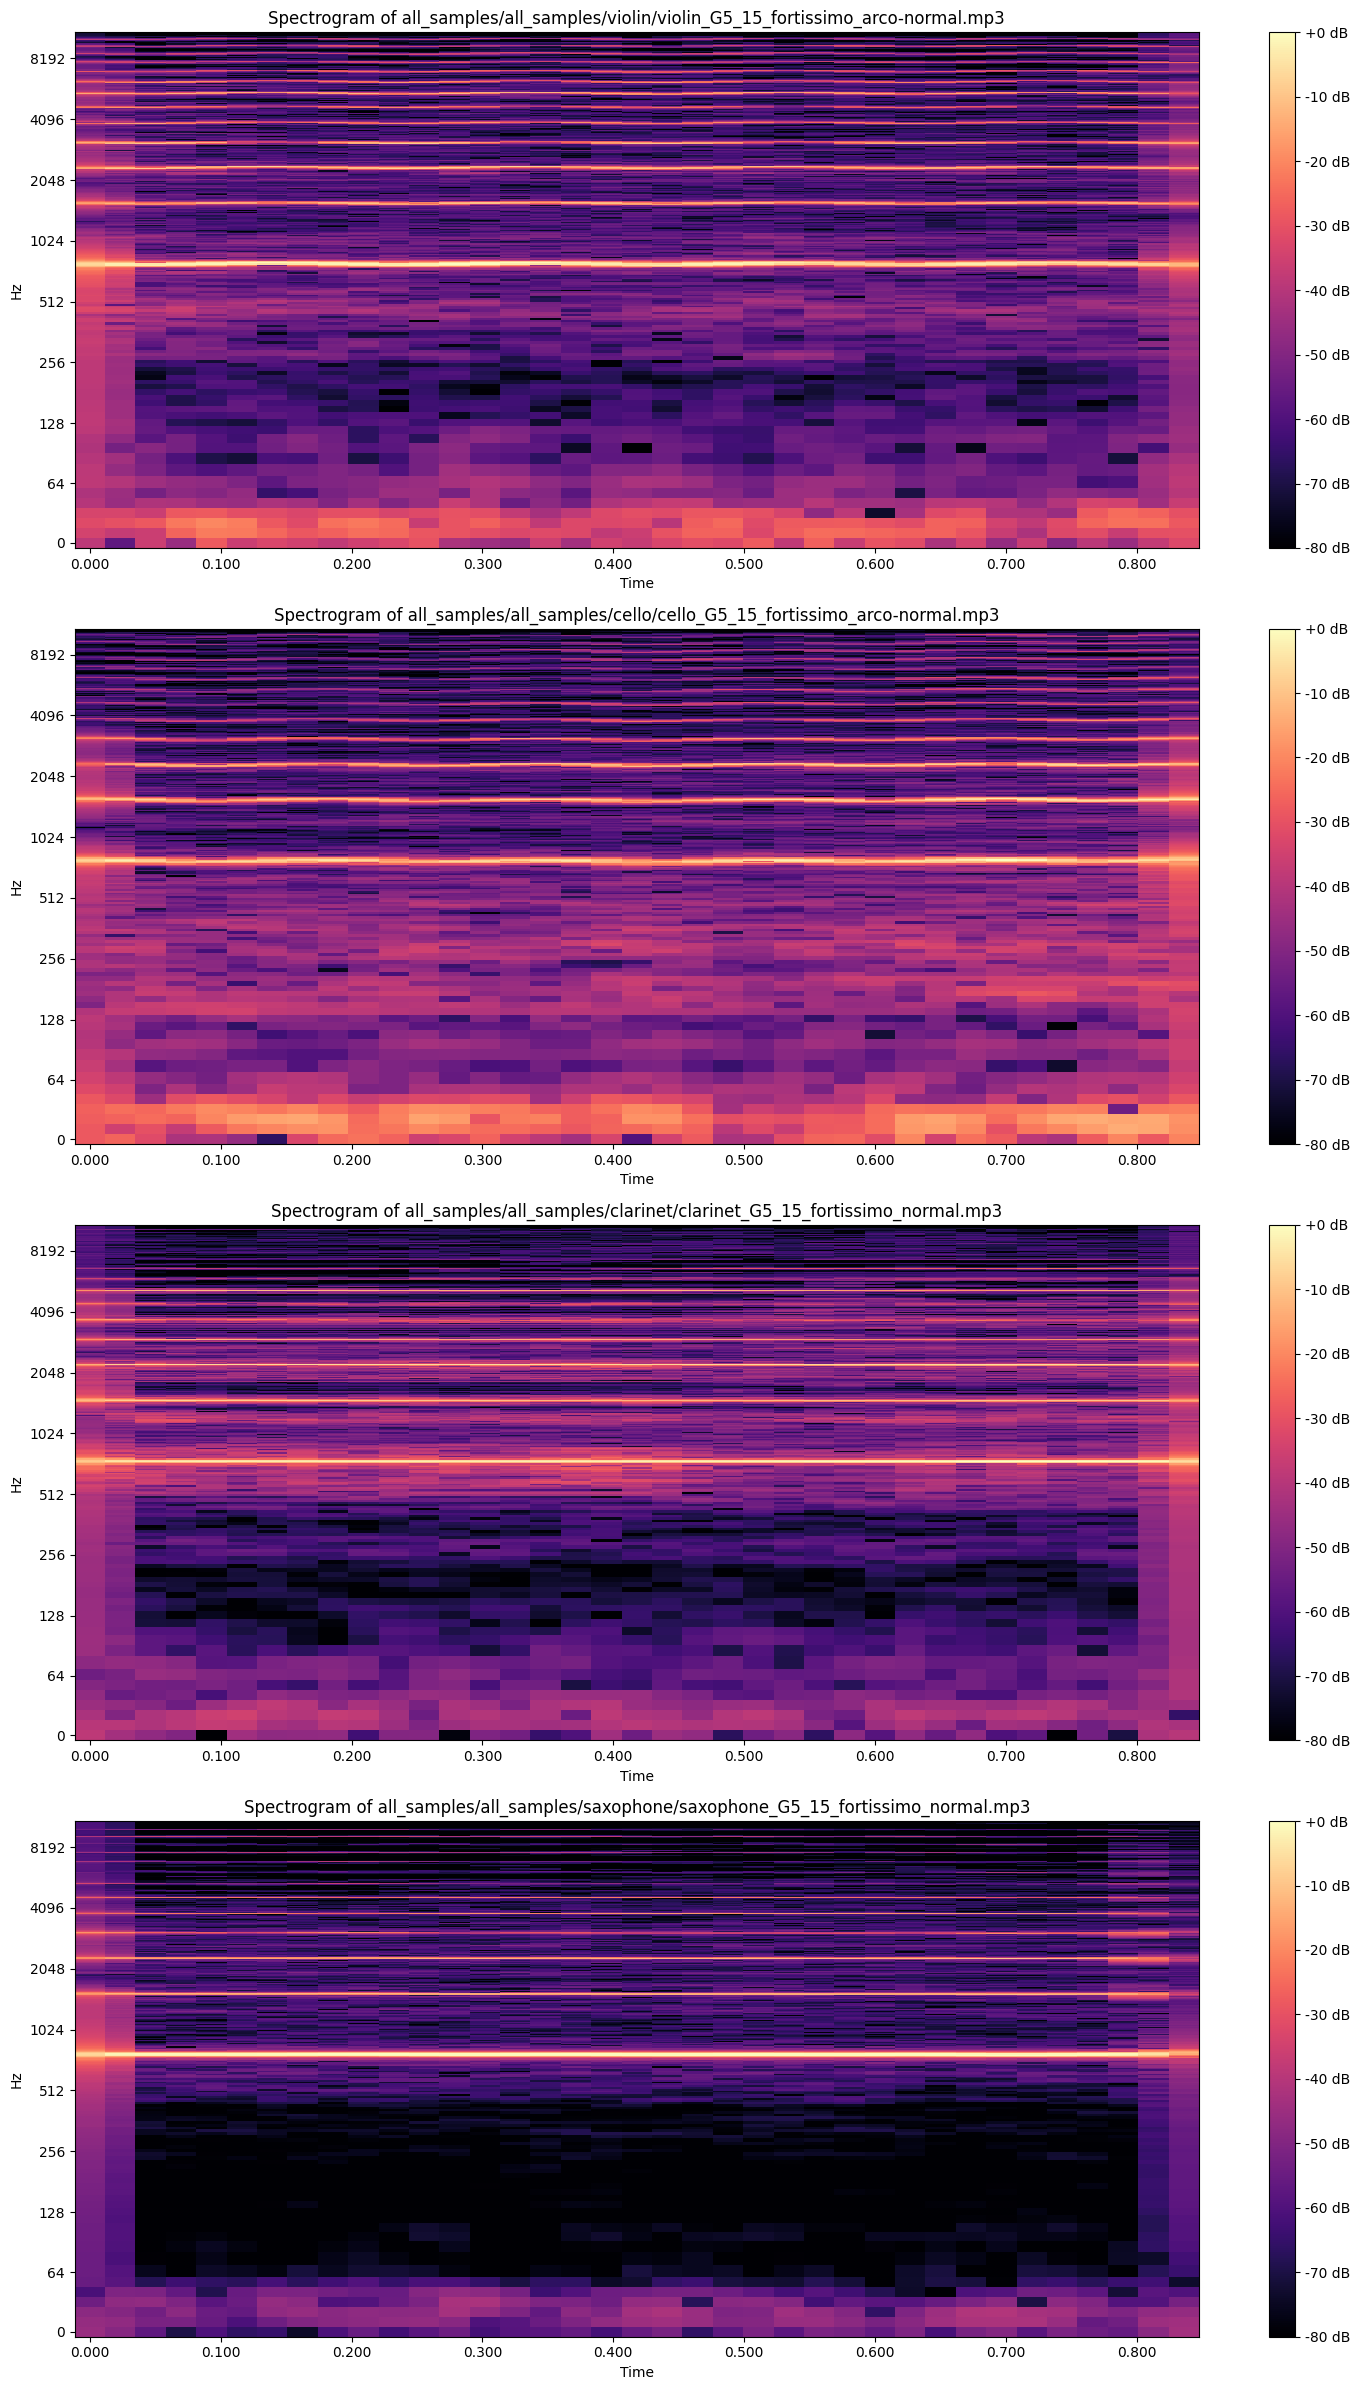

In [2]:
path = 'all_samples/all_samples/'
files = [path+'violin/violin_G5_15_fortissimo_arco-normal.mp3', path+'cello/cello_G5_15_fortissimo_arco-normal.mp3', 
         path+'clarinet/clarinet_G5_15_fortissimo_normal.mp3',path+'saxophone/saxophone_G5_15_fortissimo_normal.mp3']

durations = {file: librosa.get_duration(path=file) for file in files}
min_file = min(durations, key=durations.get)

plt.figure(figsize=(15, len(files) * 6))

for i,file in enumerate(files):

    y, sr = librosa.load(file)
    
    # calculate uniform time duration 
    start_sample = int(0.3*sr)
    end_sample = int((durations[min_file]-0.3)*sr)
    
    # cut time serie
    y = y[start_sample:end_sample]

    # spectrogram in dB
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    # Subplot for each file
    plt.subplot(len(files), 1, i+1)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {file}')

# plots
plt.tight_layout()
plt.show()

Observing the spectrograms for G5, we make the same observations as for C6, except for the difference in frequencies due to the different note being analyzed. This suggests that these differences are indeed caused by the characteristics of the instrument producing the sound.

### Musical Instrument Classification
In this section, I tested a simple criterion for classifying instruments: knowing the fundamental frequency, I calculated the ratio between the energy emitted at the second and third harmonics and the energy emitted at the fundamental frequency.
I attempted to distribute the samples on a Cartesian plane and color them to visually distinguish the areas corresponding to each instrument. Some experiments are presented here.

In [3]:
# dictionary of fundamental frequencies for each note in octave 3
note_frequencies = {
    "As": 233, 
    "A": 220,   
    "Cs": 139,
    "Ds": 156,
    "Fs": 185,
    "Gs": 208,
    "B": 247,  
    "C": 131,
    "D": 147,
    "E": 165,
    "F": 175,
    "G": 196,
}

In [6]:
# energy sum on target_freq in the middle of time domain
def calculate_energy(S, frequencies, target_freq, bandwidth=75):
    
    # find the indices of the frequencies that are within a bandwidth around the target frequency
    idx = np.where((frequencies >= target_freq - bandwidth) & (frequencies <= target_freq + bandwidth))[0]
    # total time frames 
    num_frames = S.shape[1]  
    # mid time index
    mid_time_idx = num_frames // 2 
    # compute energy  
    magnitude_S = np.abs(S[idx, mid_time_idx])  
    energy = np.sum(magnitude_S) 
    
    return energy

Here are the plots of the mentioned comparison. The samples considered for each instrument are all the audio files present in the dataset (all the notes) that are in "fortissimo" mode and have a duration greater than `0.5s`.

<img src="violinoVSclarinetto.png"  style="width: 40%;">

<img src="celloVSclarinet.png"  style="width: 40%;">

<img src="saxophoneVSclarinet.png"  style="width: 40%;">

<img src="saxophoneVSviolin.png"  style="width: 40%;">

In all the tests conducted, and as can be seen from the images shown, using this simple criterion, the area of the plane where the clarinet samples are located is distinguishable from the others. Unfortunately, this is not the case for the comparison between the other instruments. The success of the experiment in the case of the clarinet is likely due to the fact that this instrument is known for particularly emphasizing odd harmonics, and this characteristic might be captured even with such a simple comparison.
In general, using only the first three harmonics for the comparison seems insufficient to classify all the instruments. However, I expect that by applying the same criterion and increasing the number of dimensions, the results could be more satisfactory.

The following code allows you to perform tests using this comparison criterion by changing the instruments you want to test (in `folders`) and the labels for the plot (in `labels`).

Folder: all_samples/all_samples/violin
Folder: all_samples/all_samples/clarinet


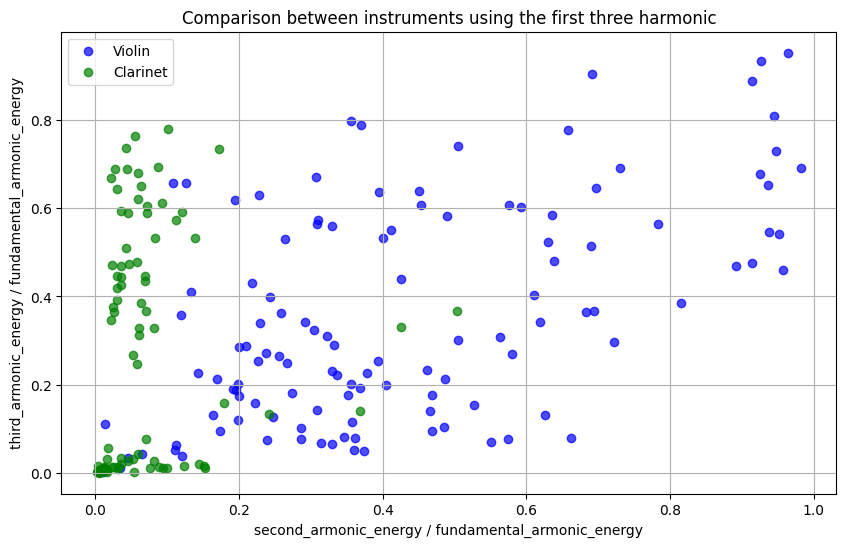

In [7]:
path = 'all_samples/all_samples/'
folders = [path+'violin', path+'clarinet']
colors = ['blue', 'green']  
labels = ['Violin','Clarinet']  

plt.figure(figsize=(10, 6))
        
for i,folder in enumerate(folders):
        print(f"\rFolder: {folder}")
        x_values = []
        y_values = []
        files = []

        for j,filename in enumerate(os.listdir(folder)):
                # filtering samples
                if 'fortissimo' in filename and '025' not in filename and '05' not in filename:
                        files.append(folder+'/'+filename)

        for file in files:

                y, sr = librosa.load(file)
                
                # find fundamental frequence basing on octave 3
                f0 = None  
                for note in note_frequencies:
                        if note in file:
                                if note +'2' in file:
                                        f0 = note_frequencies[note]/2
                                elif note +'3' in file:
                                        f0 = note_frequencies[note]
                                elif note+'4' in file:
                                        f0 = note_frequencies[note] * 2
                                elif note+'5' in file:
                                        f0 = note_frequencies[note] * 4
                                elif note+'6' in file:
                                        f0 = note_frequencies[note] * 8
                                elif note + '7' in file:
                                        f0 = note_frequencies[note] * 16
                                elif note + '8' in file:
                                        f0 = note_frequencies[note] * 32
                                else:
                                        print("Error:note not fuond")
                                        print(note)
                                        print(file)
                                break
                                        
                D = np.abs(librosa.stft(y))
                # frequencies corresponding to the axes of the spectrogram (Hz)
                frequencies = librosa.fft_frequencies(sr=sr)
                # I, II and III freq
                freqs = [f0, f0*2, f0*3]
                # calculate energy
                energy_fundamental = calculate_energy(D, frequencies, freqs[0])
                energy_harmonic_2 = calculate_energy(D, frequencies, freqs[1])
                energy_harmonic_3 = calculate_energy(D, frequencies, freqs[2])
                # calculate ratios
                x = 0
                y = 0 
                if energy_fundamental != 0: 
                        x = calculate_energy(D,frequencies, freqs[1]) / (energy_fundamental + calculate_energy(D,frequencies, freqs[1]))
                        y = calculate_energy(D,frequencies,freqs[2] ) / (energy_fundamental + calculate_energy(D,frequencies, freqs[2]))
                if x!=0:
                        x_values.append(x)
                        y_values.append(y)
       
        plt.scatter(x_values, y_values, color=colors[i], label=labels[i], alpha=0.7)


plt.title('Comparison between instruments using the first three harmonic')
plt.xlabel('second_armonic_energy / fundamental_armonic_energy')
plt.ylabel('third_armonic_energy / fundamental_armonic_energy')
plt.legend()
plt.grid(True)
plt.show()
